# Tutorial 1

I am just coding the following to be familiarize with one of the approch to classsify land use land cover from satellite EuroSAT: https://www.kaggle.com/nilesh789/land-cover-classification-with-eurosat-dataset

# Reading Dataset

In [2]:
import os
import os
os.chdir(r"C:\Users\said_\Google Drive\THE CITY COLLEGE OF NEW YORK\Ph.D.Classes\Spring21\Neural Networks\Project\Tutorial_1")
dataset = 'EuroSAT'
labels = os.listdir(dataset)
print(labels)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


# Exploratory Data Analysis

## Some Histograms to look at the distribution of the dataset

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

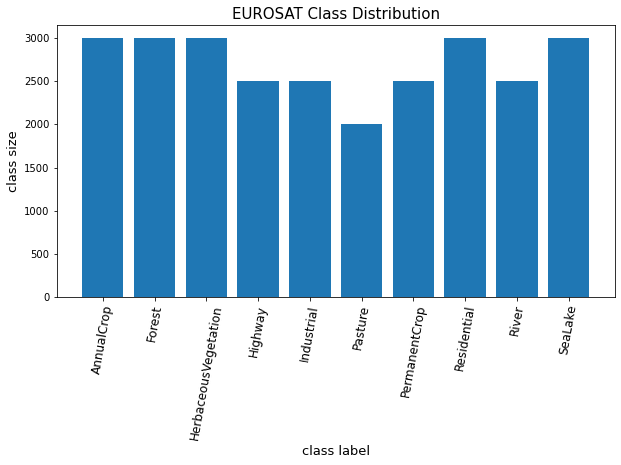

In [8]:
counts = {}

for l in labels:
    counts[l] = len(os.listdir(os.path.join(dataset, l))) # to count numbers of files inside each folder

    
plt.figure(figsize=(10, 5))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=80)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15)
plt.show()

There are 10 classes of land use land cover

## Showing some figures

In [9]:
import PIL # pillow - image processing

In [10]:
# Reading figures ended in 1000 and 2000
img_paths = [os.path.join(dataset, l, l + '_1000.jpg') for l in labels]
img_paths = img_paths + [os.path.join(dataset, l, l + '_2000.jpg') for l in labels]
print(len(img_paths))
img_paths

20


['EuroSAT\\AnnualCrop\\AnnualCrop_1000.jpg',
 'EuroSAT\\Forest\\Forest_1000.jpg',
 'EuroSAT\\HerbaceousVegetation\\HerbaceousVegetation_1000.jpg',
 'EuroSAT\\Highway\\Highway_1000.jpg',
 'EuroSAT\\Industrial\\Industrial_1000.jpg',
 'EuroSAT\\Pasture\\Pasture_1000.jpg',
 'EuroSAT\\PermanentCrop\\PermanentCrop_1000.jpg',
 'EuroSAT\\Residential\\Residential_1000.jpg',
 'EuroSAT\\River\\River_1000.jpg',
 'EuroSAT\\SeaLake\\SeaLake_1000.jpg',
 'EuroSAT\\AnnualCrop\\AnnualCrop_2000.jpg',
 'EuroSAT\\Forest\\Forest_2000.jpg',
 'EuroSAT\\HerbaceousVegetation\\HerbaceousVegetation_2000.jpg',
 'EuroSAT\\Highway\\Highway_2000.jpg',
 'EuroSAT\\Industrial\\Industrial_2000.jpg',
 'EuroSAT\\Pasture\\Pasture_2000.jpg',
 'EuroSAT\\PermanentCrop\\PermanentCrop_2000.jpg',
 'EuroSAT\\Residential\\Residential_2000.jpg',
 'EuroSAT\\River\\River_2000.jpg',
 'EuroSAT\\SeaLake\\SeaLake_2000.jpg']

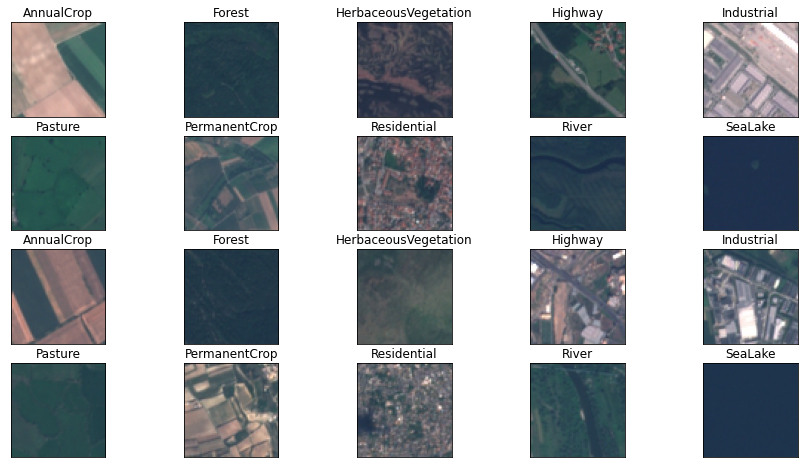

In [11]:
def plot_sat_imgs(paths):
    plt.figure(figsize = (15, 8))
    for i in range(20):
        plt.subplot(4, 5, i+1, xticks = [], yticks = [])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split("\\")[-2])
plot_sat_imgs(img_paths)

## Showing the distribution of the RGB for figures ended in 1000

In [13]:
from skimage import io

In [14]:
def plot_img_histogram(img_path):
    image = io.imread(img_path)
    plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title(img_path.split('\\')[-2])
    plt.show()

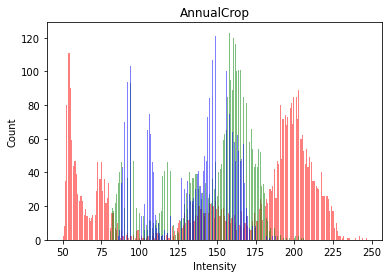

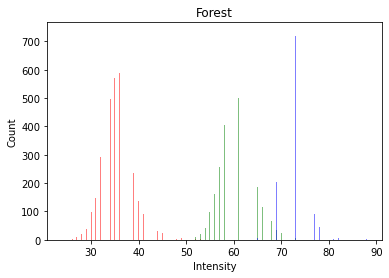

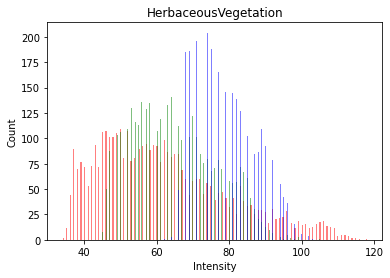

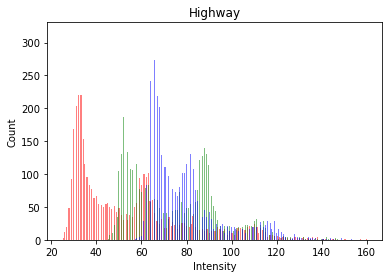

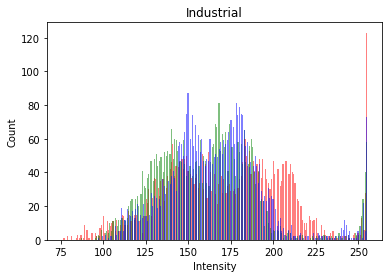

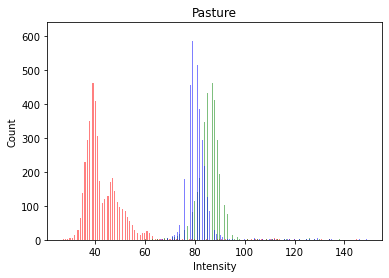

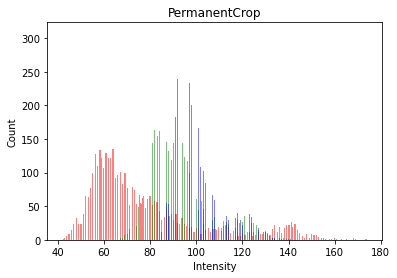

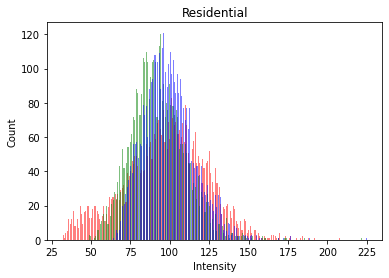

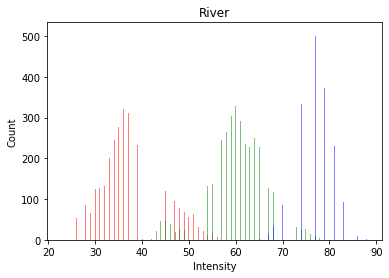

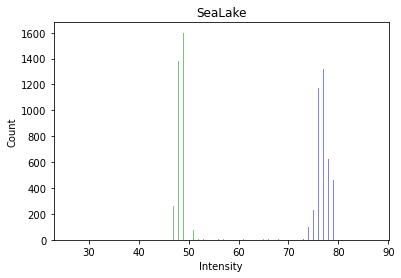

In [15]:
for l in labels:
    path = os.path.join(dataset, l, l+'_1000.jpg')
    plot_img_histogram(path)

# Training and Test Dataset

## Spliting Dataset

Splitting the dataset into 80% and 20% respectively, and saving them into 2 different folders (training_dataset,testing_dataset)

In [37]:
import re
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm # library's name: te quiero demasiado
import shutil

In [38]:
train_dir = 'training_dataset'
test_dir = 'testing_dataset'
batch_size = 128
num_classes =len(labels)
input_shape = (64, 64, 3)
class_mode = 'categorical'

In [39]:
# create training and testing directories
for path in (train_dir, test_dir):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test
for l in labels:
    
    if not os.path.exists(os.path.join(train_dir, l)):
        os.mkdir(os.path.join(train_dir, l))

    if not os.path.exists(os.path.join(test_dir, l)):
        os.mkdir(os.path.join(test_dir, l))

In [40]:
# map each image path to their class label in 'data'
data = {}

for l in labels:
    for img in os.listdir(dataset+'/'+l):
        data.update({os.path.join(dataset, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

# split the list of image paths
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]
    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub(r'EuroSAT', 'training_dataset', i) for i in train_paths]
    new_test_paths = [re.sub(r'EuroSAT', 'testing_dataset', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

  0%|          | 40/21600 [00:00<01:53, 190.62it/s]

moving training files..


  0%|          | 21/5400 [00:00<00:25, 208.47it/s]

moving testing files..


100%|██████████| 5400/5400 [00:29<00:00, 184.51it/s]


## Creating a Image Data Generator

In [41]:
# Create a ImageDataGenerator Instance which can be used for data augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
#   validation_split=0.2
)

train_generator = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    #subset='training',
    color_mode='rgb',
    shuffle=True,
    seed=69
)
# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [28]:
# Looking at the indices
print(train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [43]:
np.save('class_indices', train_generator.class_indices)

In [45]:
train_gen

# Machine Learning for Image Classification

In [51]:
# Using image data generator api in keras for making image dataset 
rf_gen = ImageDataGenerator(rescale=1./255)

rf_train_generator = rf_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    # by using batch_size as training data size we can extract data from this iterator
    batch_size=21600, 
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

rf_test_generator = rf_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


Some notes:
- Each image as the shape of 64x64x3 (dpx-dpx-(RGB)) = 12288 - see bellow

In [63]:
img = PIL.Image.open(img_paths[1], 'r')
img.size

(64, 64)

In [72]:
train[0].shape

(21600, 64, 64, 3)

In [48]:
train = rf_train_generator.next()
X_train = train[0].reshape(21600, 12288)
y_train = train[1]

test = rf_test_generator.next()
X_test = test[0].reshape(5400, 12288)
y_test = test[1]